In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
negative_x = np.random.multivariate_normal(mean = [0,3], cov=[[1,0.5],[0.5,1]], size=1000).astype(np.float32)
positive_x = np.random.multivariate_normal(mean = [3,0], cov=[[1,0.5],[0.5,1]], size=1000).astype(np.float32)

In [5]:
x = np.vstack((negative_x, positive_x))

In [13]:
y = np.vstack((np.zeros(shape=(1000, 1), dtype = np.float32), np.ones(shape=(1000, 1), dtype = np.float32)))

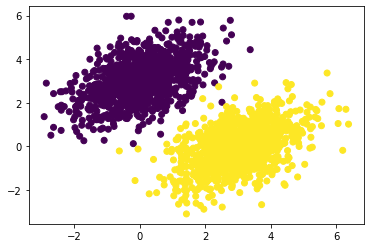

In [17]:
plt.scatter(x[:,0], x[:,1], c = y)
plt.show()

In [34]:
# initializer the weights and the bias
W = tf.Variable(initial_value = np.random.uniform(size = (2,1)), dtype = tf.float32)
b = tf.Variable(initial_value = np.zeros(shape = (1)),dtype = tf.float32)

In [25]:
def model(x):
    return tf.add(tf.matmul(x, W),b)

In [26]:
def loss(p, y):
    return tf.reduce_mean(tf.square(p - y))

In [27]:
learning_rate = 0.1

In [36]:
def train(x):
    with tf.GradientTape() as tape:
        p = model(x)
        l = loss(p, y)
    gw, gb = tape.gradient(l, [W, b])
    W.assign_sub(gw * learning_rate)
    b.assign_sub(gb * learning_rate)
    return l, p

In [37]:
# run the training algorithm on the entire batch
for i in range(50):
    l, p = train(x)
    print(f"step {i} : {l:0.4f}")

step 0 : 0.0261
step 1 : 0.0259
step 2 : 0.0258
step 3 : 0.0257
step 4 : 0.0256
step 5 : 0.0255
step 6 : 0.0254
step 7 : 0.0253
step 8 : 0.0252
step 9 : 0.0251
step 10 : 0.0251
step 11 : 0.0250
step 12 : 0.0249
step 13 : 0.0249
step 14 : 0.0248
step 15 : 0.0248
step 16 : 0.0248
step 17 : 0.0247
step 18 : 0.0247
step 19 : 0.0247
step 20 : 0.0246
step 21 : 0.0246
step 22 : 0.0246
step 23 : 0.0246
step 24 : 0.0246
step 25 : 0.0245
step 26 : 0.0245
step 27 : 0.0245
step 28 : 0.0245
step 29 : 0.0245
step 30 : 0.0245
step 31 : 0.0245
step 32 : 0.0244
step 33 : 0.0244
step 34 : 0.0244
step 35 : 0.0244
step 36 : 0.0244
step 37 : 0.0244
step 38 : 0.0244
step 39 : 0.0244
step 40 : 0.0244
step 41 : 0.0244
step 42 : 0.0244
step 43 : 0.0244
step 44 : 0.0244
step 45 : 0.0244
step 46 : 0.0244
step 47 : 0.0244
step 48 : 0.0244
step 49 : 0.0244


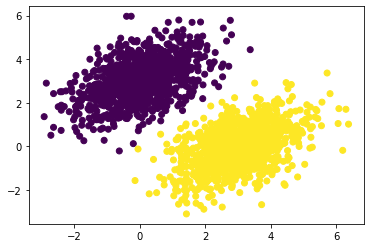

In [41]:
plt.scatter(x[:,0], x[:,1], c = p[:,0] > 0.5)
plt.show()

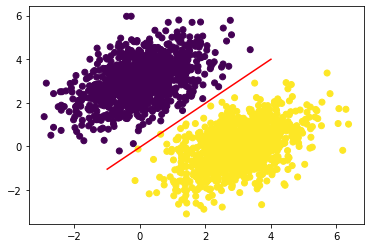

In [43]:
xx = np.linspace(-1,4,100)
yy = -W[0]/W[1] * xx + (0.5-b)/W[1]
plt.plot(xx, yy, '-r')
plt.scatter(x[:,0], x[:,1], c = p[:,0] > 0.5)
plt.show()

In [44]:
# A very good separation

In [77]:
class simpleLayer(tf.keras.layers.Layer):
    def __init__(self, units, activation):
        super().__init__()
        self.units = units
        self.activation = activation
        
#     Build the layer
    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units), initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,), initializer="random_normal")

#     perform the computations
    def call(self, inputs):
        y = tf.add(tf.matmul(inputs, self.W), self.b)
        if self.activation is not None:
            y = self.activation(y)
        return y

In [80]:
myDense = simpleLayer(units = 32, activation = tf.nn.relu)
input_tensor = tf.ones(shape = (2,784))
output_tensor= myDense(input_tensor)

In [82]:
output_tensor.shape

TensorShape([2, 32])